## [1.5 marks] Rejection sampling:
Sample the unnormalized distribution shown in the code below using rejection sampling. Use Normal(loc=5, scale=5), Uniform(-15, 15), and Laplace distribution(loc=5, scale=5) as the proposal distributions. Report the accepance ratios for each proposal distribution (You may choose suitable Multiplier value (M) while considering the support -15 < x < 15). [1 mark]

Create and compare plots showing the target distribution (taget_pdf function), proposal distribution (pdf via log_prob method), scaled proposal distribution (scaled by M), and pdf of final normalized target distribution (empirical pdf) using sns.kdeplot. [0.5 mark]

In [23]:
import torch
import torch.distributions as D
import matplotlib.pyplot as plt

In [24]:
import torch.distributions as D

def target_pdf(x):
    gaussian_pdf = D.Normal(0, 1.5).log_prob(x).exp()
    cauchy_pdf = D.Cauchy(5, 3).log_prob(x).exp()
    return 0.5 * gaussian_pdf + 0.7 * cauchy_pdf

In [25]:
#plot that target pdf
x=torch.linspace(-10,10,1000)
# print(x)
y = target_pdf(x);
# print(y);

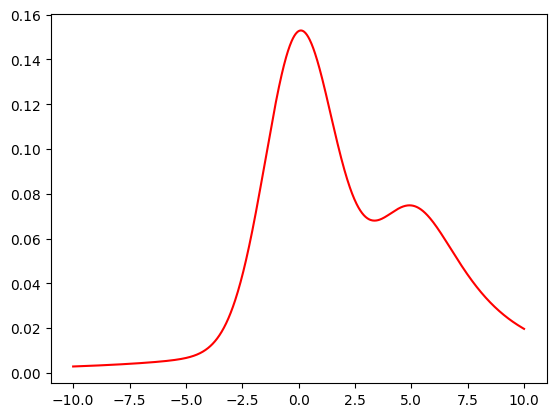

In [26]:
plt.plot(x,y,color='red');

In [27]:
q_N = D.Normal(5,5)
q_U = D.Uniform(-15,15)
q_L = D.Laplace(5,5)


##### Let $M$ be a constant such that $M \geq \frac{p(x)}{q(x)} \forall x$.


In [28]:
M = torch.max(target_pdf(x)/q_N.log_prob(x).exp())
M

tensor(3.2784)

In [29]:
proposed=q_N.log_prob(x).exp()


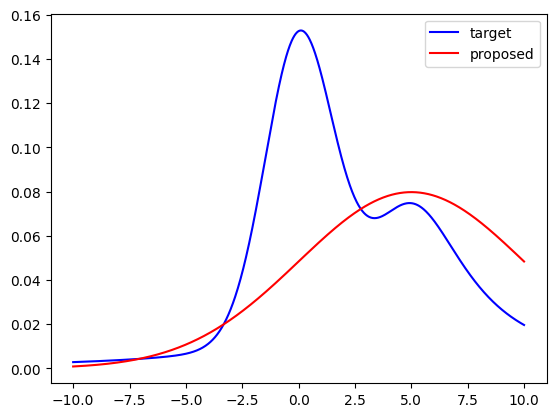

In [30]:
plt.plot(x,y,color='blue',label='target')
plt.plot(x,proposed,color='red',label='proposed')
plt.legend();

In [31]:
# function for rejection sampling

def rejection_sampling(target,proposal,M,num_samples):
    samples=[]
    accepeted=0
    for _ in range(num_samples):
        x = proposal.sample()
        u = torch.rand(1)
        if u * (M * proposal.log_prob(x).exp()) < target(x):
            samples.append(x)
            accepeted += 1
    return torch.stack(samples),accepeted/num_samples
        


In [32]:
num_samples=1000
sample_normal, acceptance_ratio_normal = rejection_sampling(target_pdf,q_N,M,num_samples)
sample_normal1, acceptance_ratio_Uniform = rejection_sampling(target_pdf,q_U,M,num_samples)
sample_normal2, acceptance_ratio_laplase = rejection_sampling(target_pdf,q_L,M,num_samples)

In [33]:
print('acceptance ratio Normal Proposal:',acceptance_ratio_normal)
print('acceptance ratio Uniform Proposal:',acceptance_ratio_Uniform)
print('acceptance ratio Laplase Proposal:',acceptance_ratio_laplase)

acceptance ratio Normal Proposal: 0.331
acceptance ratio Uniform Proposal: 0.318
acceptance ratio Laplase Proposal: 0.311


In [34]:
N=1000

In [35]:
def plot_N_samples(N=100,q=q_N,seed=0,plot_kde=False):
    torch.manual_seed(seed)
    samples_from_q = q.sample((N,))


    #evaluate the target distribution at the samples
    pxs = target_pdf(samples_from_q)

    #evaluate the scaled proposal distribution at the samples
    Mqxs = M * q.log_prob(samples_from_q).exp()

    #Draw the uniform u between 0 and 1
    us = torch.rand(N)

    #accept the samples if u < pxs / proposal_at_samples
    accepted = us *  Mqxs < pxs
    # plot p , q and mq
    plt.plot(x,y,color='blue',label='target')
    plt.plot(x,M * q.log_prob(x).exp(),color='red',label='$Mq(x)$')
    
    if not plot_kde:
        plt.scatter(samples_from_q[accepted],(us*Mqxs)[accepted],color='green',label='accepted samples',alpha=0.5,marker='.',lw=2,s=20)
        plt.scatter(samples_from_q[~accepted],(us*Mqxs)[~accepted],color='red',label='rejected samples',alpha=0.5,marker='.',lw=2,s=20)
        plt.legend()

    if plot_kde:
        import seaborn as sns
        sns.kdeplot(samples_from_q[accepted].numpy(),color='green',label='density accepted',lw=2)
        plt.legend()
    plt.title(f"Rejection  smapling with Normal proposal distribution, N={N} samples\n accept ratio={accepted.float().mean():.3f}")
    plt.show()    

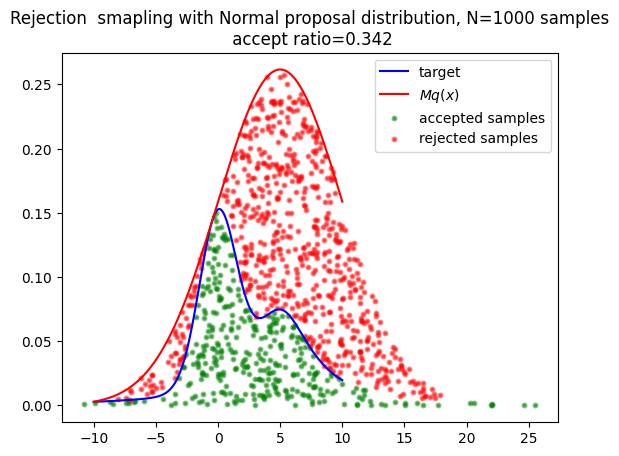

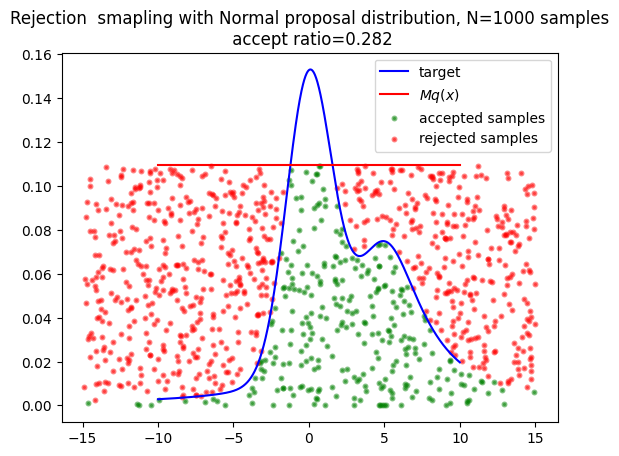

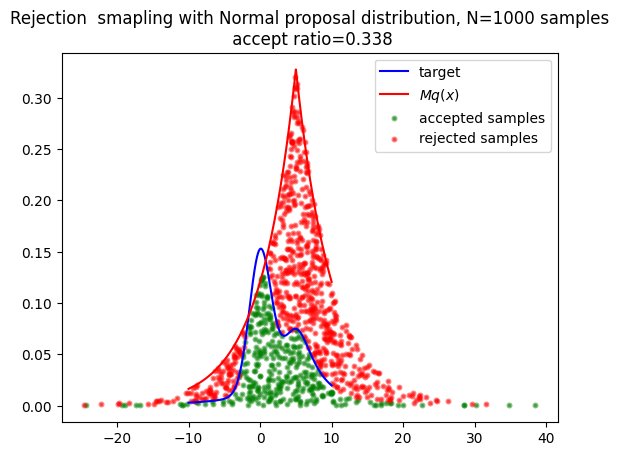

In [36]:
plot_N_samples(N=1000,q=q_N,seed=0,plot_kde=False)
plot_N_samples(N=1000,q=q_U,seed=1,plot_kde=False)
plot_N_samples(N=1000,q=q_L,seed=2,plot_kde=False)



/home/rishabh.mondal/miniconda3/envs/torch_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/rishabh.mondal/miniconda3/envs/torch_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


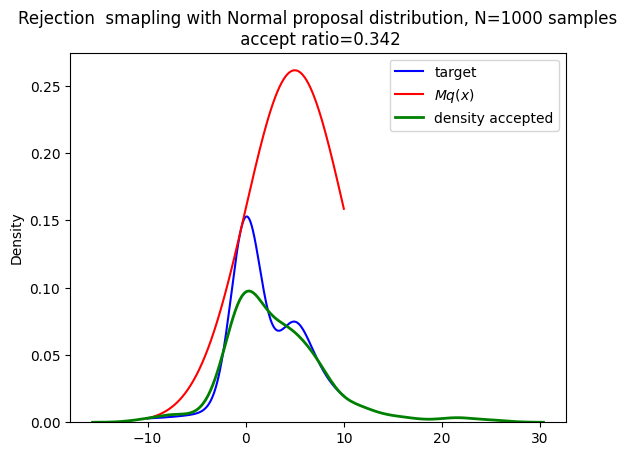

/home/rishabh.mondal/miniconda3/envs/torch_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/rishabh.mondal/miniconda3/envs/torch_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


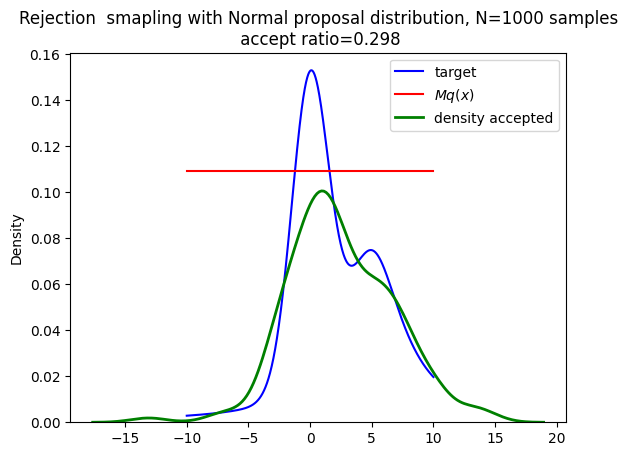

/home/rishabh.mondal/miniconda3/envs/torch_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/rishabh.mondal/miniconda3/envs/torch_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


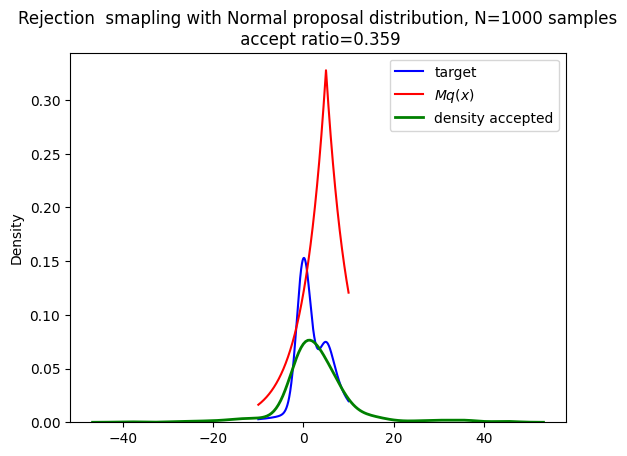

In [37]:
# plot for the function in figure 
plot_N_samples(N=1000,q=q_N,seed=0,plot_kde=True)
plot_N_samples(N=1000,q=q_U,seed=0,plot_kde=True)
plot_N_samples(N=1000,q=q_L,seed=0,plot_kde=True)


[1.5 marks] Inverse CDF sampling for Cauchy distribution:
Analytically derive the Inverse CDF from the CDF of the Cauchy distribution. [0.5 mark]


Repeat (ii.) using inverse CDF from torch.distributions.Cauchy. You can access the inverse CDF at dist.icdf where dist is an instance of torch.distributions.Cauchy. [0.5 mark]


To perform the inverse CDF sampling, we need to need to derive the inverse CDF from the CDF of the Cauchy distribution. 

The Cauchy distribution does not have a closed form inverse CDF. However, we can derive it step by step.

The probablity density function of the Cauchy distribution is given by:

$$f(x|x_0,\gamma) = \frac{1}{\pi\gamma\left[1+\left(\frac{x-x_0}{\gamma}\right)^2\right]} $$

where :

$x_0$ is the location parameter, specifying the location of the peak of the distribution(median).

$x$ is the random variable.

$\gamma$ is the scale parameter which specifies the half-width at half-maximum (HWHM), which is the distance between the peak and the inflection points of the distribution.

The CDF of the Cauchy distribution can computed by integrating the PDF:

$$F(x|x_0,\gamma) = \frac{1}{\pi}\arctan\left(\frac{x-x_0}{\gamma}\right) + \frac{1}{2}$$

The inverse CDF ,which menas solving $x$ in terms of $F(x)$:

$$F(x) = \frac{1}{\pi}\arctan\left(\frac{x-x_0}{\gamma}\right) + \frac{1}{2}$$

Let's isolate $x$:

$$\pi\left(F(x) - \frac{1}{2}\right) = \arctan\left(\frac{x-x_0}{\gamma}\right)$$

Now take the tangent of both sides:

$$\tan\left[\pi\left(F(x) - \frac{1}{2}\right)\right] = \frac{x-x_0}{\gamma}$$

Finally,solve for $x$:

$$x = x_0 + \gamma\tan\left[\pi\left(F(x) - \frac{1}{2}\right)\right]$$

This is the inverse CDF of the Cauchy distribution. Simply plug in the value of $F(x)$ between 0 and 1 to obtain the corresponding samples of $x$.


Draw samples from the Cauchy distribution (loc=0, scale=1) with inverse CDF sampling. Use the inverse CDF derived in (i.). While generating samples from the uniform distribution, restrict the samples to be between 0.05 and 0.95 to avoid numerical instability. Verify that drawn samples are correct by plotting the kernel density estimation (empirical pdf) with sns.kdeplot (sns stands for the seaborn library) along with pdf obtained with dist.log_prob, where dist is torch.distributions.Cauchy(loc=0, scale=1) [0.5 mark]




In [59]:
import numpy as np
import seaborn as sns
N=1000
x=torch.linspace(-10,10,N)
# inverse cdf of the cauchy distribution
def cauchy_inv_cdf(y,loc=0,scale=1):
    return loc + scale * torch.tan(torch.tensor(np.pi) * (y - 0.5))

# genarate uniform sample betweeen 0.05 and 0.95 using torch

u = D.Uniform(0.05,0.95).sample((N,))

# genarate cauchy sample using inverse cdf
cauchy_samples = cauchy_inv_cdf(u)

/home/rishabh.mondal/miniconda3/envs/torch_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/rishabh.mondal/miniconda3/envs/torch_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


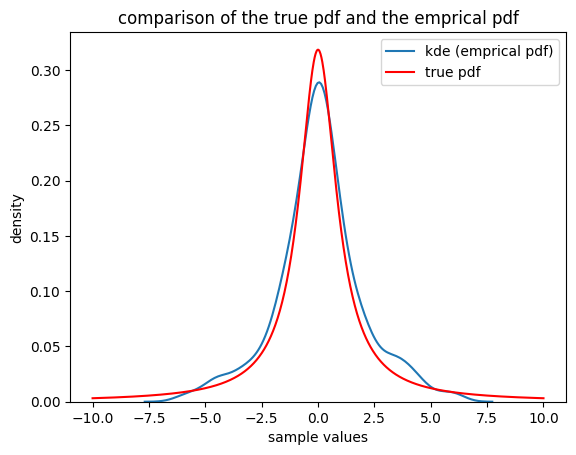

In [65]:
# log probability density of the cauchy distribution
dist = D.Cauchy(0,1)
pdf = dist.log_prob(x).exp()

#plotting the kernel density estimation (empirical pdf) with sns.

sns.kdeplot(cauchy_samples,label='kde (emprical pdf)')
plt.plot(x,pdf,label='true pdf',color='red')
plt.legend()
plt.xlabel('sample values')
plt.ylabel('density')
plt.title('comparison of the true pdf and the emprical pdf');

Repeat (ii.) using inverse CDF from torch.distributions.Cauchy. You can access the inverse CDF at dist.icdf where dist is an instance of torch.distributions.Cauchy. [0.5 mark]

/home/rishabh.mondal/miniconda3/envs/torch_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/rishabh.mondal/miniconda3/envs/torch_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/rishabh.mondal/miniconda3/envs/torch_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/rishabh.mondal/miniconda3/envs/torch_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_in

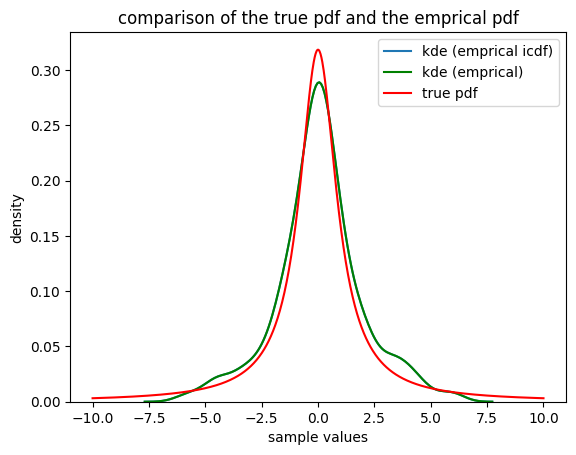

In [63]:
samples = dist.icdf(u)
sns.kdeplot(samples,label='kde (emprical icdf)')
sns.kdeplot(cauchy_samples,label='kde (emprical)',color='green')
plt.plot(x,pdf,label='true pdf',color='red')
plt.legend()
plt.xlabel('sample values')
plt.ylabel('density')
plt.title('comparison of the true pdf and the emprical pdf');


Take p(x) = Uniform(-a, a). Choose the following values of a {0.01, 0.02, 0.05, 0.1, 0.5, 1, 2, 3, 5}. Draw 1000 samples for each a and plot the normalizing constant on y-axis for each value of a on x-axis. Draw a horizontal line showing the analytical normalizing constant as ground truth. [1 marks]

Estimate I using Monte Carlo integration for varying number of MC samples {10, 100, 10^3 , 10^4, 10^5} for a=4. For each value of number of MC samples, repeat the experiment 10 times and plot the mean estimate with plt.plot and the standard deviation of the estimate using plt.fill_between. [1 mark]

Repeat (i.) using scipy.integrate.quad and compare it with the estimates obtained in (i.) using a similar plot used in (i.). [0.5 mark]


In [71]:
def target_distribution(x):
    return np.exp(-x**2/2)

# range of a 
a = [0.01, 0.02, 0.05, 0.1, 0.5, 1, 2, 3, 5]

# estimated constant
estimated_constant = []

# ground truth constant
ground_truth_constant = np.sqrt(2*np.pi)

num_samples = 1000

for i in a:
    uniform_samples = D.Uniform( -i, i).sample((num_samples,))
    integral_estimate = (2 * i) * target_distribution(uniform_samples).mean()
    estimated_constant.append(integral_estimate)



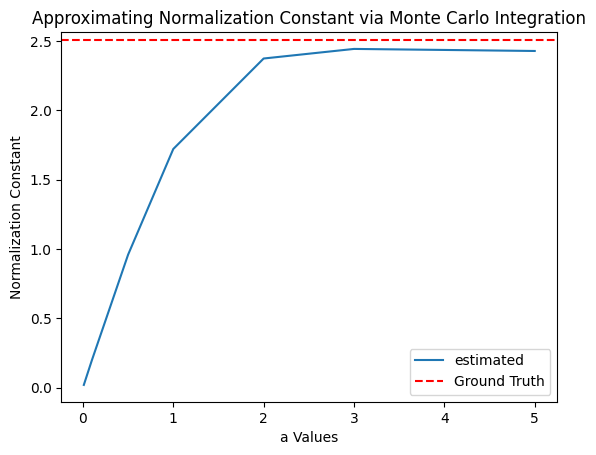

In [72]:
#Plot the estimated normalization constants along with the analytical ground truth:

plt.plot(a, estimated_constant, label='estimated')
plt.axhline(y=ground_truth_constant, color='r', linestyle='--', label='Ground Truth')
plt.xlabel('a Values')
plt.ylabel('Normalization Constant')
plt.title('Approximating Normalization Constant via Monte Carlo Integration')
plt.legend();


In [79]:
from scipy.integrate import quad


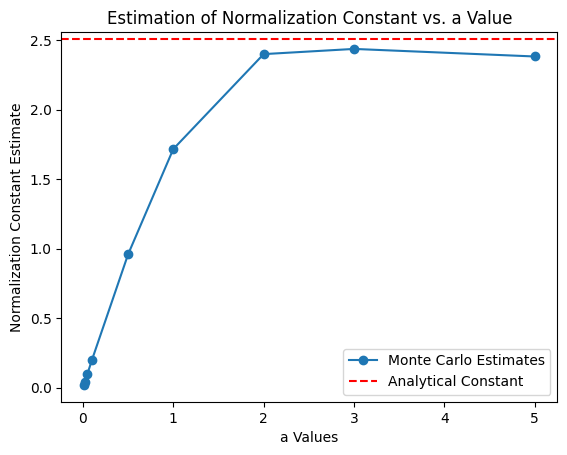

In [81]:
def target_pdf(x):
    return np.exp(-x**2 / 2)

# Define the Monte Carlo integration function
def monte_carlo_integration(a, num_samples):
    uniform_samples = np.random.uniform(-a, a, num_samples)
    pdf_values = target_pdf(uniform_samples)
    estimate = np.mean(pdf_values) * (2 * a)
    return estimate


analytical_constant, _ = quad(target_pdf, -np.inf, np.inf)

# Calculate Monte Carlo estimates for each 'a' value
estimates = [monte_carlo_integration(i, num_samples) for i in a]

plt.plot(a, estimates, marker='o', label='Monte Carlo Estimates')
plt.axhline(analytical_constant, color='red', linestyle='--', label='Analytical Constant')
plt.xlabel('a Values')
plt.ylabel('Normalization Constant Estimate')
plt.title('Estimation of Normalization Constant vs. a Value')
plt.legend()

In [74]:
# a values
a = 4

# Number of MC samples
num_samples_list = [10, 100, 1000, 10000, 100000]

num_iteration = 10

mean_estimates = []
std_dev_estimates = []

# Perform Monte Carlo integration for each sample size
for num_samples in num_samples_list:
    estimates = []
    for _ in range(num_iteration):
        uniform_samples = D.Uniform(-a, a).sample((num_samples,))
        integral_estimate = (2 * a) * target_distribution(uniform_samples).mean()
        estimates.append(integral_estimate)
    mean_estimates.append(np.mean(estimates))
    std_dev_estimates.append(np.std(estimates))
    


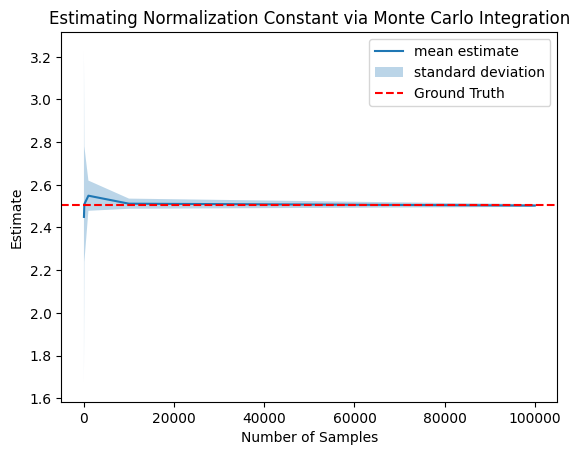

In [75]:
#plot the mean estimate with plt.plot and the standard deviation of the estimate using plt.fill_between. 

plt.plot(num_samples_list, mean_estimates, label='mean estimate')
plt.fill_between(num_samples_list, np.array(mean_estimates) - np.array(std_dev_estimates), np.array(mean_estimates) + np.array(std_dev_estimates), alpha=0.3, label='standard deviation')
plt.axhline(y=ground_truth_constant, color='r', linestyle='--', label='Ground Truth')
plt.xlabel('Number of Samples')
plt.ylabel('Estimate')
plt.title('Estimating Normalization Constant via Monte Carlo Integration')
plt.legend();

In [ ]:
from scipy.integrate import quad

def integrand(x):
    return (2 * a) * target_distribution(x)




### Genarate the following classifiaction dataset

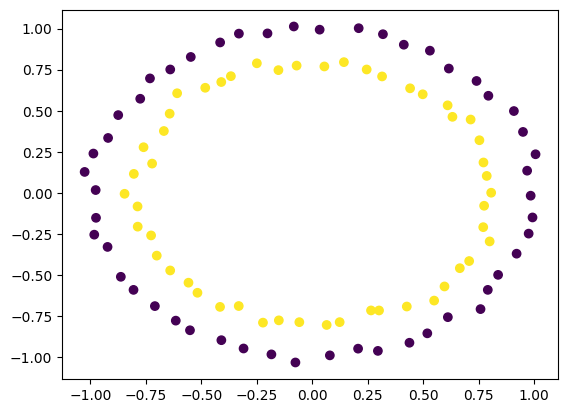

In [ ]:
from sklearn.datasets import make_circles
X,y = make_circles(n_samples=100,noise=0.02,random_state=42)
plt.scatter(X[:,0],X[:,1],c=y);

In [ ]:
#We want to perform classification with the following Neural Network which returns logits for the cross-entropy loss:

import torch.nn as nn
model = nn.Sequential(
    nn.Linear(2,8),
    nn.ReLU(),
    nn.Linear(8,1))

## First Linear Layer (nn.Linear(2, 8)):

The input size is 2.

The output size is 8.

There is a weight matrix of size (8, 2) for the connections between the input and output.

There is also a bias vector of size (8).

Total parameters in this layer = (8 * 2) + 8 = 16 + 8 = 24.

Second Linear Layer (nn.Linear(8, 1)):

The input size is 8.

The output size is 1.

There is a weight matrix of size (1, 8) for the connections between the input and output.

There is also a bias vector of size (1).

Total parameters in this layer = (1 * 8) + 1 = 8 + 1 = 9.


In [ ]:
# # Define the likelihood
# prior = torch.distributions.Normal(0, 1)

# # Define the likelihood (Binary Cross-Entropy Loss)
# criterion = nn.BCEWithLogitsLoss()

# optimizer = optim.Adam(model.parameters(), lr=0.01)
# X = torch.tensor(X, dtype=torch.float32)
# y = torch.tensor(y, dtype=torch.float32)

# epochs = 1000
# for epoch in range(epochs):
#     optimizer.zero_grad()
#     logits = model(X).squeeze(-1)
#     likelihood_term = criterion(logits, y)

#     # compute the prior term 
#     prior_term = 0
#     for param in model.parameters():
#         prior_term += prior.log_prob(param).sum()

#  # Total loss is a combination of likelihood and prior terms
    total_loss = likelihood_term + prior_term
    

NameError: name 'optim' is not defined